# Supervised Learning | Regression (Polynomial Regression)


### Importing Libraries


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

### Importing & Creating Dataset


In [108]:
manufacturing = pd.read_csv('data/manufacturing.csv')
manufacturing.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


### Exploring Data


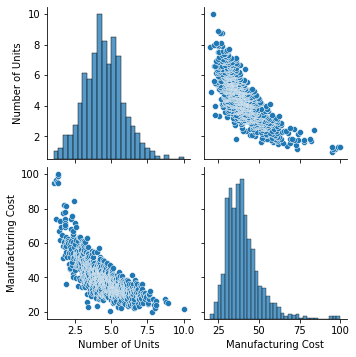

In [109]:
sns.pairplot(manufacturing)


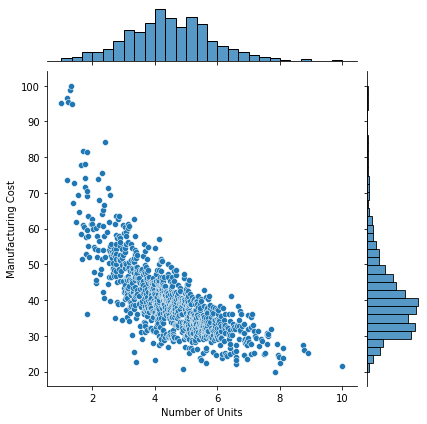

In [110]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data = manufacturing)

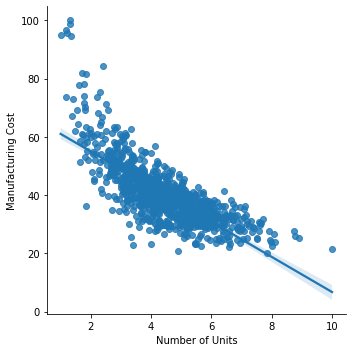

In [111]:
# sns.regplot(x='Number of Units', y='Manufacturing Cost', data=manufacturing)
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=manufacturing)

### Splitting Data

In [112]:
X = manufacturing[['Number of Units']]

In [113]:
y  = manufacturing['Manufacturing Cost']

### Model Training & Building 


##### 1] Linear Model


In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
reg = LinearRegression(fit_intercept =True)

In [116]:
reg.fit(X, y)

LinearRegression()

In [117]:
reg.coef_

array([-6.0333683])

In [118]:
reg.intercept_

67.03904193389238

##### Visualizing Results


Text(0.5, 1.0, 'Unit Cost vs. Number of Units')

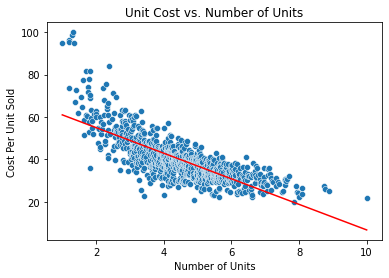

In [119]:
sns.scatterplot(data=manufacturing, x='Number of Units', y='Manufacturing Cost')
plt.plot(X, reg.predict(X), c='r')

plt.ylabel('Cost Per Unit Sold')
plt.xlabel('Number of Units')
plt.title('Unit Cost vs. Number of Units')

##### 2] Polynomial Model


In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
poly = PolynomialFeatures(degree=4)

In [122]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04]])

In [123]:
reg_poly = LinearRegression()

In [124]:
reg_poly.fit(X_poly, y)

LinearRegression()

In [125]:
reg_poly.coef_

array([ 0.00000000e+00, -5.43308190e+01,  1.22452385e+01, -1.29910949e+00,
        5.12914120e-02])

In [126]:
reg_poly.intercept_

131.7171595360375

##### Visualizing Results


Text(0.5, 1.0, 'Unit Cost vs. Number of Units')

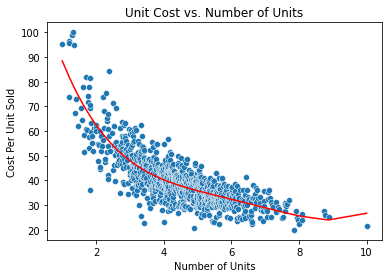

In [127]:
sns.scatterplot(data=manufacturing, x='Number of Units', y='Manufacturing Cost')
plt.plot(X, reg_poly.predict(X_poly), c = 'r')

plt.ylabel('Cost Per Unit Sold')
plt.xlabel('Number of Units')
plt.title('Unit Cost vs. Number of Units')

### Evaluating Models


In [128]:
reg.score(X, y)

0.5789767558506287

In [129]:
reg_poly.score(X_poly, y)

0.693152396881535